In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read Dataset

data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MaunaLoaDailyTemps.csv')
data.head()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,1/1/2014,33.0,46.0,40.0,657,1756
1,1/2/2014,35.0,50.0,43.0,657,1756
2,1/3/2014,36.0,45.0,41.0,657,1757
3,1/4/2014,32.0,41.0,37.0,658,1757
4,1/5/2014,24.0,38.0,31.0,658,1758


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     1825 non-null   object 
 1   MinTemp  1821 non-null   float64
 2   MaxTemp  1821 non-null   float64
 3   AvgTemp  1821 non-null   float64
 4   Sunrise  1825 non-null   int64  
 5   Sunset   1825 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 85.7+ KB


In [4]:
#DATE column is in object format so convert it into datetime format

data['DATE']=pd.to_datetime(data['DATE'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     1825 non-null   datetime64[ns]
 1   MinTemp  1821 non-null   float64       
 2   MaxTemp  1821 non-null   float64       
 3   AvgTemp  1821 non-null   float64       
 4   Sunrise  1825 non-null   int64         
 5   Sunset   1825 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 85.7 KB


In [5]:
#Check null values

data.isnull().sum()

,0
DATE,0
MinTemp,4
MaxTemp,4
AvgTemp,4
Sunrise,0
Sunset,0


In [6]:
# Replace null values with mean

data['MinTemp'].fillna(data['MinTemp'].mean(),inplace=True)
data['MaxTemp'].fillna(data['MaxTemp'].mean(),inplace=True)
data['AvgTemp'].fillna(data['AvgTemp'].mean(),inplace=True)
data.isnull().sum()

<ipython-input-6-36f5f08be1d1>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['MinTemp'].fillna(data['MinTemp'].mean(),inplace=True)
<ipython-input-6-36f5f08be1d1>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

,0
DATE,0
MinTemp,0
MaxTemp,0
AvgTemp,0
Sunrise,0
Sunset,0


In [7]:
#Seprate year,month from DATE column

data['year']=data['DATE'].dt.year
data['month']=data['DATE'].dt.month

In [21]:
data.head()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset,year,month
0,2014-01-01,33.0,46.0,40.0,657,1756,2014,1
1,2014-01-02,35.0,50.0,43.0,657,1756,2014,1
2,2014-01-03,36.0,45.0,41.0,657,1757,2014,1
3,2014-01-04,32.0,41.0,37.0,658,1757,2014,1
4,2014-01-05,24.0,38.0,31.0,658,1758,2014,1


In [8]:
#plotting some Graphs

def plot_vars(data,x,y,year):
  fig,ax=plt.subplots(figsize=(12,7))

  sns.lineplot(ax=ax,data=data,x=x,y=y,hue=year,palette='bright')
  plt.show()


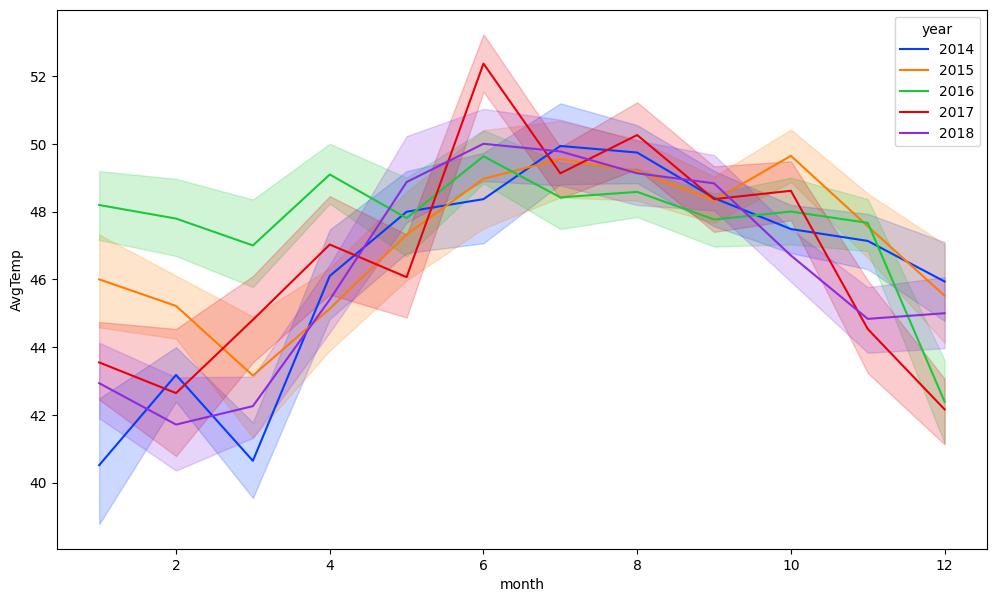

In [17]:
plot_vars(data,'month','AvgTemp','year')

**The average maximum temp. is 52 degrees in June of 2017**

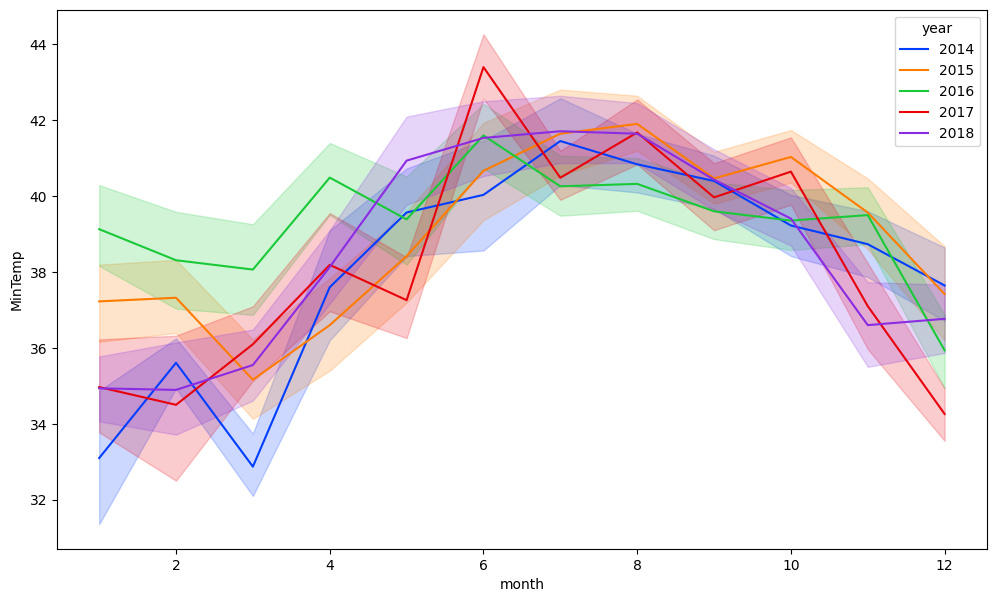

In [9]:
plot_vars(data,'month','MinTemp','year')

**The minimun temp. is 33 degrees in march of 2014**

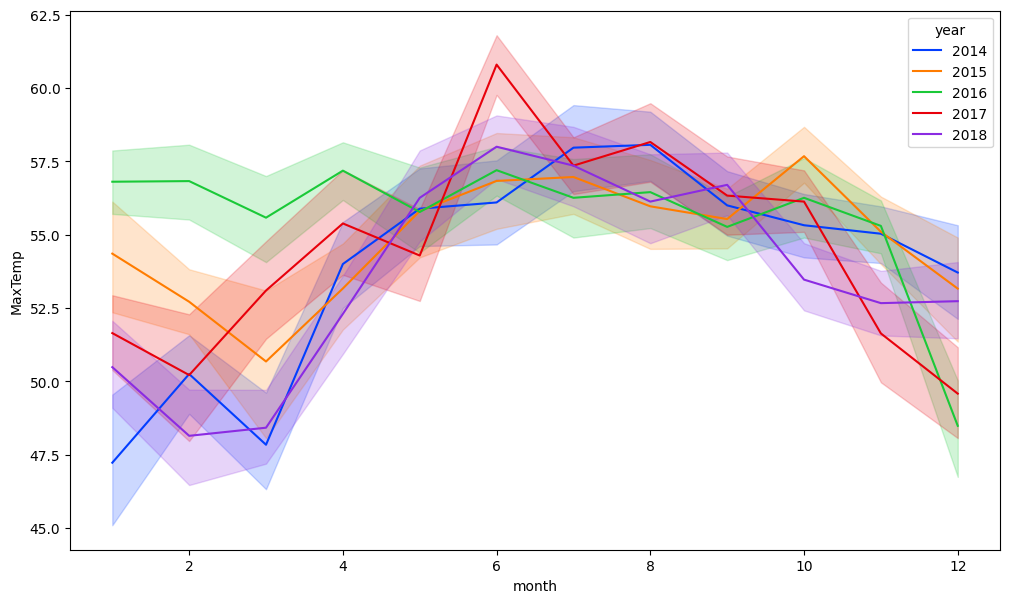

In [10]:
plot_vars(data,'month','MaxTemp','year')

**The maximum temp. is 60 degrees in june of 2017**

In [11]:
data.corr()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset,year,month
DATE,1.000000,0.053355,-0.000981,0.021943,-0.010206,-0.082376,0.979796,0.198094
MinTemp,0.053355,1.000000,0.756071,0.917456,-0.426545,0.300292,0.008065,0.227273
MaxTemp,-0.000981,0.756071,1.000000,0.951039,-0.374685,0.275693,-0.028994,0.137476
AvgTemp,0.021943,0.917456,0.951039,1.000000,-0.422555,0.304508,-0.015698,0.186767
Sunrise,-0.010206,-0.426545,-0.374685,-0.422555,1.000000,-0.739530,-0.000930,-0.049215
Sunset,-0.082376,0.300292,0.275693,0.304508,-0.739530,1.000000,0.001064,-0.416064
year,0.979796,0.008065,-0.028994,-0.015698,-0.000930,0.001064,1.000000,-0.001232
month,0.198094,0.227273,0.137476,0.186767,-0.049215,-0.416064,-0.001232,1.000000


In [12]:
#To fit the ARIMA model we choose avg.temp. column so drop all columns and predict avg.temp based on DATE column

df=data.drop(columns=['MinTemp','MaxTemp','Sunrise','Sunset','year','month'])

In [13]:
df=df.set_index('DATE')

In [14]:
df.head()

,AvgTemp
DATE,
2014-01-01,40.0
2014-01-02,43.0
2014-01-03,41.0
2014-01-04,37.0
2014-01-05,31.0


In [19]:
!pip install prophet


In [23]:
#Visualization using FB Prophet :

from prophet.plot import plot_plotly,plot_components_plotly
from prophet import Prophet

In [31]:
#Chage column names for FB prophet
df.rename_axis('ds',inplace=True)
df.head()

,y
ds,
2014-01-01,40.0
2014-01-02,43.0
2014-01-03,41.0
2014-01-04,37.0
2014-01-05,31.0


In [32]:
df.columns=['y']
df.head()

,y
ds,
2014-01-01,40.0
2014-01-02,43.0
2014-01-03,41.0
2014-01-04,37.0
2014-01-05,31.0


In [52]:
#Train Test Split : (last one year values as test data)

train = df.iloc[:len(df)-365]
test = df.iloc[len(df)-365:]

In [47]:
df=df.drop('index',axis=1)

In [49]:
df=df.drop('level_0',axis=1)

In [50]:
df.head()

,ds,y
0,2014-01-01,40.0
1,2014-01-02,43.0
2,2014-01-03,41.0
3,2014-01-04,37.0
4,2014-01-05,31.0


In [53]:
# Predictions :

m=Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=365) #MS for monthly, H for hourly
forecast = m.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk00obzm5/rvsy0awf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk00obzm5/k8dv5w_i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72768', 'data', 'file=/tmp/tmpk00obzm5/rvsy0awf.json', 'init=/tmp/tmpk00obzm5/k8dv5w_i.json', 'output', 'file=/tmp/tmpk00obzm5/prophet_modelr6yksq4z/prophet_model-20241211122414.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:24:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:24:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [54]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1820,2018-12-26,46.290924,37.156547,45.779316,44.601277,47.926933,-4.885644,-4.885644,-4.885644,-0.060036,-0.060036,-0.060036,-4.825608,-4.825608,-4.825608,0.0,0.0,0.0,41.405280
1821,2018-12-27,46.290346,36.905288,46.163824,44.590149,47.933788,-4.745706,-4.745706,-4.745706,0.097625,0.097625,0.097625,-4.843331,-4.843331,-4.843331,0.0,0.0,0.0,41.544639
1822,2018-12-28,46.289767,37.417996,46.683299,44.579082,47.940643,-4.406932,-4.406932,-4.406932,0.425769,0.425769,0.425769,-4.832701,-4.832701,-4.832701,0.0,0.0,0.0,41.882835
1823,2018-12-29,46.289189,36.955924,46.065883,44.568702,47.947498,-4.787256,-4.787256,-4.787256,0.006589,0.006589,0.006589,-4.793845,-4.793845,-4.793845,0.0,0.0,0.0,41.501933
1824,2018-12-30,46.288611,36.769557,45.784504,44.561426,47.953644,-4.967515,-4.967515,-4.967515,-0.240149,-0.240149,-0.240149,-4.727365,-4.727365,-4.727365,0.0,0.0,0.0,41.321096


In [55]:
#We want only this columns :

forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1820,2018-12-26,41.405280,37.156547,45.779316
1821,2018-12-27,41.544639,36.905288,46.163824
1822,2018-12-28,41.882835,37.417996,46.683299
1823,2018-12-29,41.501933,36.955924,46.065883
1824,2018-12-30,41.321096,36.769557,45.784504


In [56]:
plot_plotly(m,forecast)

In [57]:
plot_components_plotly(m,forecast)

/usr/local/lib/python3.10/dist-packages/plotly/io/_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



In [32]:
# To apply ARIMA model we have to check the data is stationary or not by using Augumented Dickey Fuller Test
# Augumented Dickey Fuller Test :

from statsmodels.tsa.stattools import adfuller
def adf_test(df):
  dftest=adfuller(df,autolag='AIC')
  print('1. ADF : ',dftest[0])
  print('2. p-value : ',dftest[1])
  print('3. Num. Of LAGS : ',dftest[2])
  print('4. No. of observation used for ADF regression : ',dftest[3])
  print('5. critical values : ')
  for key, val in dftest[4].items():
    print('\t',key,': ',val)
adf_test(df['AvgTemp'])



1. ADF :  -6.594563113389793
2. p-value :  6.977825912591916e-09
3. Num. Of LAGS :  12
4. No. of observation used for ADF regression :  1812
5. critical values : 
	 1% :  -3.4339640110318004
	 5% :  -2.8631363845692475
	 10% :  -2.567619862152732


In [33]:
!pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.8 MB/s eta 0:00:00


In [34]:
# Apply Auto ARIMA Model :

from pmdarima import auto_arima
arimadf=auto_arima(df['AvgTemp'],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8367.004, Time=6.88 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10366.472, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8392.171, Time=0.20 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9157.155, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19234.261, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8383.250, Time=1.72 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8383.888, Time=3.93 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8374.760, Time=7.09 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8346.251, Time=3.79 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8359.387, Time=3.47 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8346.218, Time=8.18 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8358.095, Time=5.15 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8346.772, Time=8.39 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8334.924, Time=6.11 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

In [42]:
#Divide data into train and test :

import statsmodels.api as sm
train=df.iloc[:-30]
test=df.iloc[-30:]
print(df.shape)
print(train.shape,test.shape)


(1825, 1)
(1795, 1) (30, 1)


In [43]:
#Fit the SARIMA model :

model=sm.tsa.arima.ARIMA(train['AvgTemp'],order=(1,0,5))
model=model.fit()
model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1795
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -4083.793
Date:                Wed, 11 Dec 2024   AIC                           8183.586
Time:                        07:07:02   BIC                           8227.528
Sample:                    01-01-2014   HQIC                          8199.809
                         - 11-30-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5821      0.761     61.187      0.000      45.090      48.074
ar.L1          0.9859      0.005    190.359      0.000       0.976       0.996
ma.L1         -0.1462      0.023     -6.353      0.000      -0.191      -0.101
ma.L2         -0.2278      0.023     -9.698      0.000      -0.274      -0.182
ma.L3         -0.2079      0.023     -8.900      0.000      -0.254      -0.162
ma.L4         -0.1508      0.023     -6.614      0.000      -0.196      -0.106
ma.L5         -0.0623      0.024     -2.542      0.011      -0.110      -0.014
sigma2         5.5372      0.175     31.599      0.000       5.194       5.881
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.33
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
# Prdictions :

start=len(train)
end=len(train) + len(test) - 1
pred=model.predict(start=start,end=end,typ='levels',rename='ARIMA Predictions')
pred.index=df.index[start:end+1]
print(pred)
pred.dtypes

DATE
2018-12-01    44.768046
2018-12-02    44.994982
2018-12-03    45.370067
2018-12-04    45.708997
2018-12-05    45.857463
2018-12-06    45.867712
2018-12-07    45.877817
2018-12-08    45.887778
2018-12-09    45.897598
2018-12-10    45.907280
2018-12-11    45.916825
2018-12-12    45.926234
2018-12-13    45.935511
2018-12-14    45.944656
2018-12-15    45.953672
2018-12-16    45.962561
2018-12-17    45.971323
2018-12-18    45.979962
2018-12-19    45.988479
2018-12-20    45.996875
2018-12-21    46.005152
2018-12-22    46.013313
2018-12-23    46.021358
2018-12-24    46.029289
2018-12-25    46.037108
2018-12-26    46.044816
2018-12-27    46.052416
2018-12-28    46.059907
2018-12-29    46.067293
2018-12-30    46.074575
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ', 'rename']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


dtype('float64')

<Axes: xlabel='DATE'>

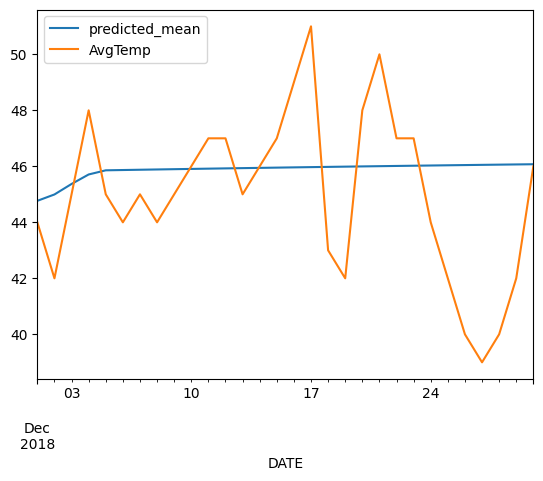

In [45]:
#Predictions VS Actual Results :

pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)

**We can see that arima predictions are better than Avg.Temp. Because Avg.Temp. is not stationary it fluctuates.**


In [46]:
test['AvgTemp'].mean()

45.0

In [47]:
# Calculate Error of model :

from sklearn.metrics import mean_squared_error
from math import sqrt

In [49]:
rmse=sqrt(mean_squared_error(pred,test['AvgTemp']))
print(rmse)

2.998804179690803


In [50]:
# Prediction for all data :

model2=sm.tsa.arima.ARIMA(df['AvgTemp'],order=(1,0,5))
model2=model2.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [52]:
index_future_dates=pd.date_range(start='2018-12-30',end='2019-01-29')
print(index_future_dates)

DatetimeIndex(['2018-12-30', '2018-12-31', '2019-01-01', '2019-01-02',
               '2019-01-03', '2019-01-04', '2019-01-05', '2019-01-06',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-12', '2019-01-13', '2019-01-14',
               '2019-01-15', '2019-01-16', '2019-01-17', '2019-01-18',
               '2019-01-19', '2019-01-20', '2019-01-21', '2019-01-22',
               '2019-01-23', '2019-01-24', '2019-01-25', '2019-01-26',
               '2019-01-27', '2019-01-28', '2019-01-29'],
              dtype='datetime64[ns]', freq='D')


In [53]:
#Predictions for next 30 days :

pred=model2.predict(start=len(df),end=len(df)+30,types='levels').rename('Arima Predictions')
pred.index=index_future_dates
pred

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['types']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


,Arima Predictions
2018-12-30,46.412666
2018-12-31,46.113965
2019-01-01,45.640397
2019-01-02,45.262949
2019-01-03,45.122442
2019-01-04,45.141739
2019-01-05,45.160771
2019-01-06,45.179541
2019-01-07,45.198053
2019-01-08,45.216310


<Axes: >

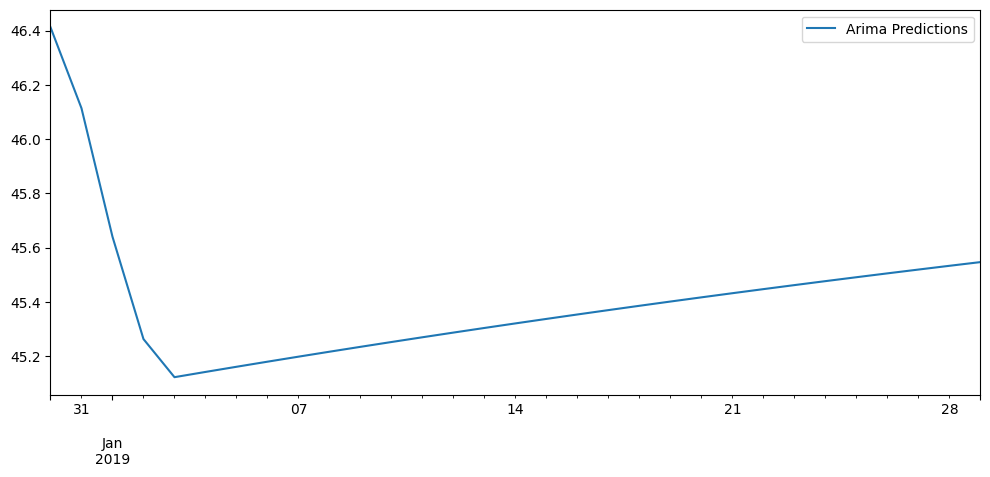

In [54]:
pred.plot(figsize=(12,5),legend=True)

**Avg.Temp. from Jan-3 is increases till end of the month**